In [6]:
import numpy as np
import sys 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import scipy.ndimage

In [7]:
from readData import *
from showFig import *
from showCloud import *

In [8]:
points0, mat0 = getPoints("..//nomarker//nomarker2.npy")
depth = points0[:,2].reshape((1472, 1944))
avg = depth.mean()

read in ..//nomarker//nomarker2.npy
x range: -32306 ~ 8510
y range: -5556 ~ 21488
z range: -71459 ~ 276916


In [9]:
depth[depth>-30] = avg
depth[depth<-100] = avg

In [10]:
Sx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Sy = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

Gx = scipy.ndimage.convolve(depth, Sx, mode='constant')
Gy = scipy.ndimage.convolve(depth, Sy, mode='constant')

grad_magnitude = np.sqrt(Gx**2+Gy**2)

norm_grad = (grad_magnitude-grad_magnitude.mean())/(grad_magnitude.max()-grad_magnitude.min())


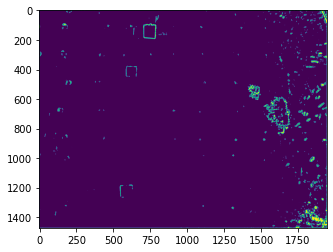

In [11]:
plt.imshow(norm_grad>0)

In [3]:
points1, mat1 = getPoints(r"..\plane\full2.npy", prange=(200, 150, (-100, -30)), skip=20)
points0, mat0 = getPoints(r"..\plane\full0.npy", prange=(200, 150, (-100, -30)), skip=20)

read in ..\plane\full2.npy
x range: -186 ~ 196
y range: -150 ~ 143
z range: -52 ~ 17
read in ..\plane\full0.npy
x range: -197 ~ 198
y range: -157 ~ 145
z range: -70 ~ 456


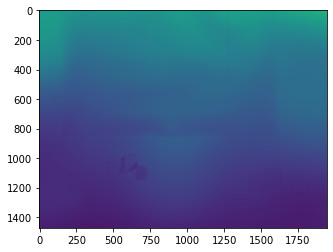

In [9]:
plt.imshow(depth**4)

-52.362164

read in ..\plane\marker2.npy
x range: -1999 ~ 6977
y range: -5598 ~ 1740
z range: -59566 ~ 18648


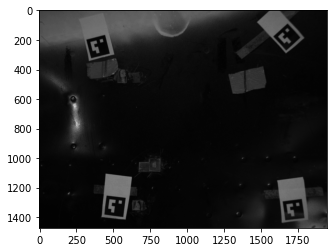

In [4]:
markerpoints, marker = getPoints(r"..\plane\marker2.npy", prange=(200, 150, (-100, -30)), skip=20)
plt.imshow(marker, 'gray')
plt.imsave("testtag.png", marker, cmap="gray")

In [14]:
fig = dynVisual([points0, points1], ["src", "tgt"], 0.5, 1)
fig.write_html("cloud.html")
# fig.show()

In [8]:
fig = dynVisual(names=["..\glu\glue1", "..\glu\glue2"], skip=40, zaugment=2, s=1)
# fig = addCloud(fig, ["stitch\SizectorS_PointCloudExport2"], skip=20, zaugment=1)
# fig = addCloud(fig, ["stitch\SizectorS_PointCloudExport3"], skip=20, zaugment=1)
fig.write_html("cloudpointglue.html")

read in glu/glue1
x range: -192 ~ 195
y range: -146 ~ 147
z range: -86 ~ 107
read in glu/glue2
x range: -193 ~ 199
y range: -147 ~ 147
z range: -89 ~ 104


In [ ]:
pp = np.load("scan7.npy")
mat = pp[:972*736, 3]
mat = mat.reshape((736, 972))
plt.imshow(mat, cmap="gray")